<a href="https://colab.research.google.com/github/2147118Joshua/2147118_CAC1_WB/blob/main/Image_preprocessing_methods_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RGB color space

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


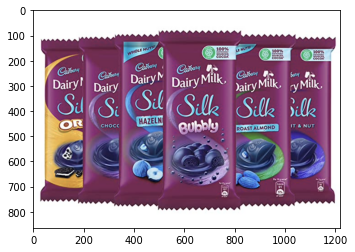

In [4]:
image = cv2.imread('/content/chocolate.png')
plt.imshow(image)
plt.show()

You’ll notice that it looks like the blue and red channels have been mixed up. In fact, OpenCV by default reads images in BGR format

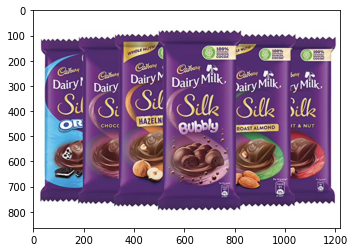

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

#Visualizing image in RGB Color Space

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

Text(0.5, 0, 'Blue')

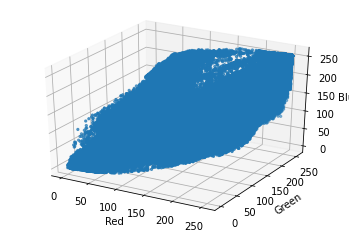

In [7]:

r, g, b = cv2.split(image)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(r.flatten(), g.flatten(), b.flatten(), marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")

From this plot, you can see that the blue parts of the image span across almost the entire range of red, green, and blue values. Since parts of image stretch over the whole plot, segmenting image out in RGB space based on blue of RGB values would not be easy.

 OpenCV split() is very handy here; it splits an image into its component 


channels. 

#Visualizing image in HSV Color Space

HSV stands for Hue, Saturation, and Value (or brightness), and is a cylindrical color space. The colors, or hues, are modeled as an angular dimension rotating around a central, vertical axis, which represents the value channel. Values go from dark (0 at the bottom) to light at the top. The third axis, saturation, defines the shades of hue from least saturated, at the vertical axis, to most saturated furthest away from the center

In [8]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

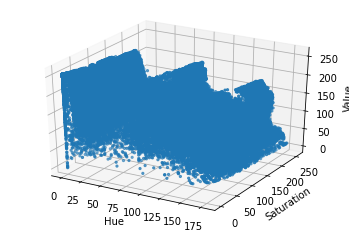

In [9]:
h, s, v = cv2.split(hsv_image)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In HSV space, images blue are much more localized and visually separable. The saturation and value of the blue do vary, but they are mostly located within a small range along the hue axis. This is the key point that can be leveraged for segmentation.

#CMYK color space

Unlike, RGB it is a subtractive color space. The CMYK model works by partially or entirely masking colors on a lighter, usually white, background. The ink reduces the light that would otherwise be reflected. Such a model is called subtractive because inks “subtract” the colors red, green and blue from white light. White light minus red leaves cyan, white light minus green leaves magenta, and white

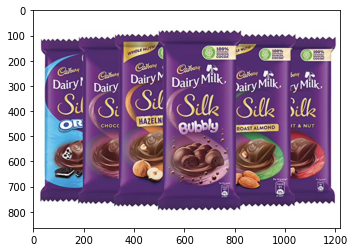

In [10]:
image = cv2.imread('/content/chocolate.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [11]:
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('/content/chocolate.png').convert('CMYK').save('result.tif')


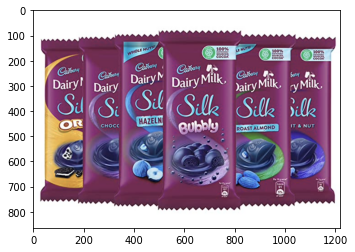

In [12]:
imagecmyk = cv2.imread('/content/result.tif')
plt.imshow(imagecmyk)
plt.show()

# NOISES IN IMAGES

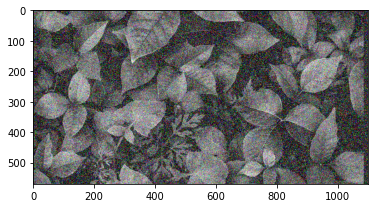

In [13]:

from skimage.util import random_noise

# Load the image
img = cv2.imread("/content/leaf.png")

# Add salt-and-pepper noise to the image.
noise_img = random_noise(img, mode='s&p',amount=0.3)

# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_img = np.array(255*noise_img, dtype = 'uint8')

# Display the noise image
plt.imshow(noise_img)
plt.show()

gaussian noise

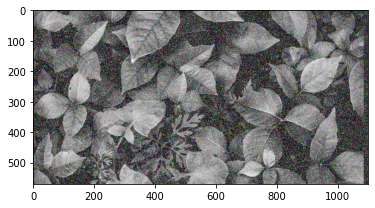

In [14]:
import cv2
import numpy as np

img = cv2.imread('/content/leaf.png')
# Generate Gaussian noise
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
plt.imshow(img_gauss)
plt.show()

speckle noise

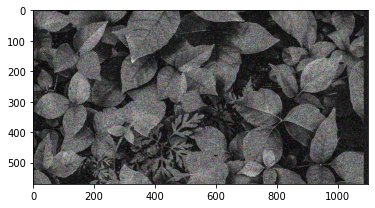

In [15]:


img = cv2.imread('/content/leaf.png')

gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
noise = img + img * gauss

plt.imshow(noise)
plt.show()

# Apply linear and non-linear filters


cv2.filter2D() is used to perform convolution operation with 2D image and the kernel(N x M dimensional matrix) is used

In [16]:
def compare_image(image1, image2):
  plt.figure(figsize=(9,9))
  plt.subplot(1,2,1)
  plt.imshow(image1)
  plt.title('Orignal')
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(image2)
  plt.title('Modified')
  plt.axis('off')

  plt.tight_layout()

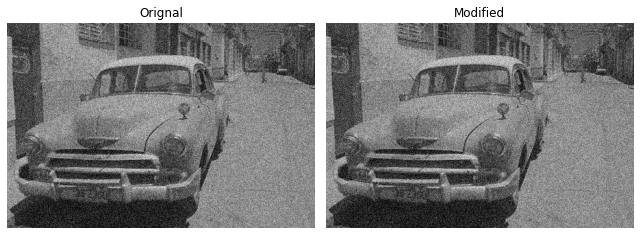

In [17]:
img = cv2.imread('/content/car.png')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
compare_image(img2,img)

2d concolution

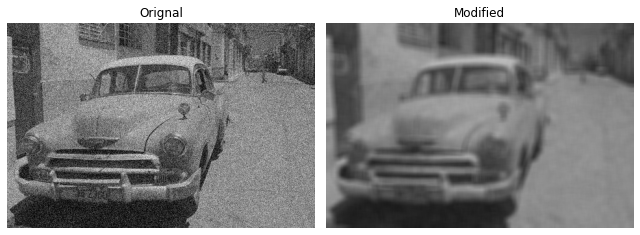

In [18]:
kernel = np.ones((10,10),np.float32)/100
cnv = cv2.filter2D(img2, -1, kernel)
compare_image(img2,cnv)

Image Smoothing:
Image smoothing is achieved by convolving the image with different filters. It is useful for removing the high-frequency content such as noise and edges from the image, resulting in blurred edges when these filters are applied

* Averaging
The averaging is done by simply convolving the image with a normalized box filter. It takes the average of all pixels under the kernel window and replaces the central element with this average

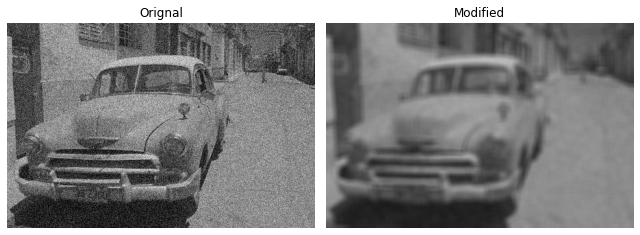

In [19]:
## Average Filtering
blur = cv2.blur(img2,(10,10))
compare_image(img2,blur)

* Median Filtering:
cv2.medianBlur() computes the median of all the pixels under the kernel window and replaces the central value with the median value. This filter is highly used to remove noise from the image. 

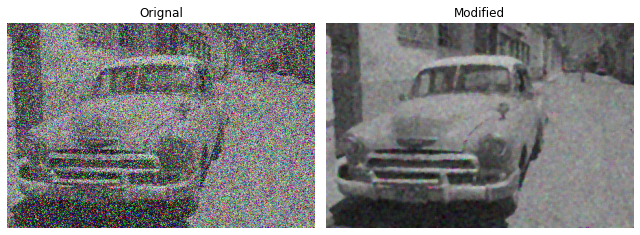

In [20]:
from skimage.util import random_noise
## adding noise
noise_img = random_noise(img2, mode='s&p',amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')
## median filter
median = cv2.medianBlur(noise_img,5)
compare_image(noise_img,median)

* Bilateral Filtering:
The previous filters blur the image, but the bilateral filter tends to blur the image preserving the edges between the objects. In addition, while blurring the image, the bilateral filter considers the nearby pixel intensity values and considers whether the pixel is on edge or not; this makes the operation of this filter a bit slow

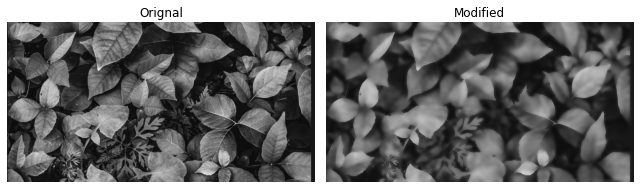

In [21]:
## bilateral filtering
img = cv2.imread('/content/leaf.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blur = cv2.bilateralFilter(img,20,200,300)
compare_image(img,blur)

#Morphological Filters:
Morphological filters are some simple operations based on image shape. These filters need two inputs: image and kernel, which decides the nature of the operation.

* Erosion:
It is just like soil erosion; it erodes the boundary, it warns away the boundaries of foreground objects, i.e., tries to keep the foreground white. So the operation follows as the kernel slides over the image, and a pixel of the image is considered one only if all the pixels under the kernel are 1; otherwise, it is eroded

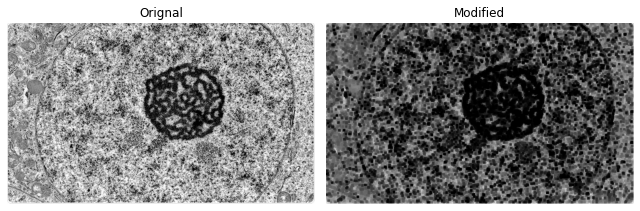

In [22]:
# erosion
img = cv2.imread('/content/leaf2.webp',0)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations=1)
compare_image(img,erosion)

* Dilation:
It is just the opposite of erosion; here, the pixel is considered as one if at least one pixel under the kernel is one, so in this case, it increases the white region in the image. Dilation is also helpful in joining the broken part of an object

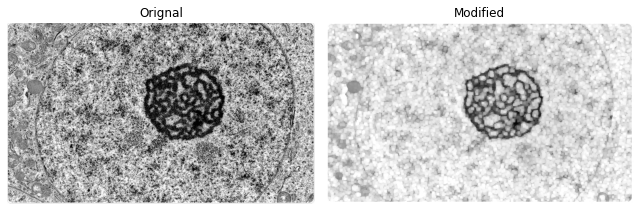

In [23]:
# Dilation
dia = cv2.dilate(img,kernel,iterations=1)
compare_image(img,dia)

* Morphological Gradient:
It is the difference between the dilation and erosion, and the result looks like the object’s outline.

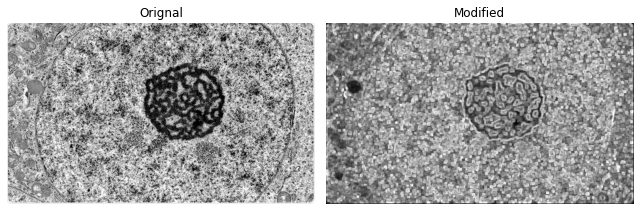

In [24]:
# gradient
grad = cv2.morphologyEx(img,cv2.MORPH_GRADIENT, kernel)
compare_image(img,grad)